In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('euro-daily-hist_1999_2022.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6785 entries, 0 to 6784
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6785 non-null   object 
 1   [Australian dollar ]      6785 non-null   object 
 2   [Bulgarian lev ]          6383 non-null   object 
 3   [Brazilian real ]         6517 non-null   object 
 4   [Canadian dollar ]        6785 non-null   object 
 5   [Swiss franc ]            6785 non-null   object 
 6   [Chinese yuan renminbi ]  6517 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6785 non-null   object 
 9   [Danish krone ]           6785 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6785 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6785 non-null   object 
 14  [Croatia

In [2]:
df.isnull().sum()

Period\Unit:                   0
[Australian dollar ]           0
[Bulgarian lev ]             402
[Brazilian real ]            268
[Canadian dollar ]             0
[Swiss franc ]                 0
[Chinese yuan renminbi ]     268
[Cypriot pound ]            4439
[Czech koruna ]                0
[Danish krone ]                0
[Estonian kroon ]           3655
[UK pound sterling ]           0
[Greek drachma ]            6265
[Hong Kong dollar ]            0
[Croatian kuna ]             844
[Hungarian forint ]            0
[Indonesian rupiah ]           0
[Israeli shekel ]            268
[Indian rupee ]              268
[Iceland krona ]            2407
[Japanese yen ]                0
[Korean won ]                  0
[Lithuanian litas ]         2626
[Latvian lats ]             2881
[Maltese lira ]             4439
[Mexican peso ]                0
[Malaysian ringgit ]           0
[Norwegian krone ]             0
[New Zealand dollar ]          0
[Philippine peso ]             0
[Polish zl

In [3]:
df.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2025-04-02,1.7146,1.9558,6.1212,1.5479,0.9543,7.8529,NaN,24.963,7.4611,...,4.9775,NaN,10.764,1.4508,NaN,NaN,36.93,40.9573,1.0803,20.1042
1,2025-04-01,1.7255,1.9558,6.1679,1.5529,0.952,7.8431,NaN,24.954,7.4616,...,4.9774,NaN,10.816,1.4492,NaN,NaN,36.846,40.9201,1.0788,19.7741
2,2025-03-31,1.7318,1.9558,6.2507,1.5533,0.9531,7.8442,NaN,24.962,7.4613,...,4.9771,NaN,10.849,1.4519,NaN,NaN,36.706,41.0399,1.0815,19.8782
3,2025-03-28,1.712,1.9558,6.2252,1.5444,0.9525,7.8445,NaN,24.96,7.4616,...,4.9774,NaN,10.82,1.4481,NaN,NaN,36.664,41.0387,1.0797,19.6113
4,2025-03-27,1.7101,1.9558,6.2154,1.5425,0.9524,7.8361,NaN,24.982,7.4605,...,4.9773,NaN,10.8235,1.445,NaN,NaN,36.529,40.9940,1.0785,19.7061


In [4]:
df = df.iloc[:,[0,1,4,-2,-7]]
df.columns = ['Date', 'Australian dollar', 'Canadian dollar', 'Singapore dollar', 'US dollar']
df

,Date,Australian dollar,Canadian dollar,Singapore dollar,US dollar
0,2025-04-02,1.7146,1.5479,1.0803,1.4508
1,2025-04-01,1.7255,1.5529,1.0788,1.4492
2,2025-03-31,1.7318,1.5533,1.0815,1.4519
3,2025-03-28,1.712,1.5444,1.0797,1.4481
4,2025-03-27,1.7101,1.5425,1.0785,1.445
...,...,...,...,...,...
6780,1999-01-08,1.8406,1.7643,1.1659,1.9537
6781,1999-01-07,1.8474,1.7602,1.1632,1.9436
6782,1999-01-06,1.8820,1.7711,1.1743,1.9699
6783,1999-01-05,1.8944,1.7965,1.1790,1.9655


In [5]:
df = pd.melt(df, id_vars='Date', value_vars=['Australian dollar','Canadian dollar','Singapore dollar','US dollar'], value_name='Euro rate', var_name='Currency')
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Date'] >= '2024-12-01'].reset_index(drop=True)
df['Euro rate'] = pd.to_numeric(df['Euro rate'])
print(f'Currencies: {df.Currency.unique()}\n')
print(df)

Currencies: ['Australian dollar' 'Canadian dollar' 'Singapore dollar' 'US dollar']

          Date           Currency  Euro rate
0   2025-04-02  Australian dollar     1.7146
1   2025-04-01  Australian dollar     1.7255
2   2025-03-31  Australian dollar     1.7318
3   2025-03-28  Australian dollar     1.7120
4   2025-03-27  Australian dollar     1.7101
..         ...                ...        ...
335 2024-12-06          US dollar     1.4174
336 2024-12-05          US dollar     1.4133
337 2024-12-04          US dollar     1.4135
338 2024-12-03          US dollar     1.4140
339 2024-12-02          US dollar     1.4138

[340 rows x 3 columns]


In [6]:
usd = df[df['Currency']=='US dollar'].reset_index(drop= True)
usd.head()

,Date,Currency,Euro rate
0,2025-04-02,US dollar,1.4508
1,2025-04-01,US dollar,1.4492
2,2025-03-31,US dollar,1.4519
3,2025-03-28,US dollar,1.4481
4,2025-03-27,US dollar,1.4450


<Axes: xlabel='Date', ylabel='Euro rate'>

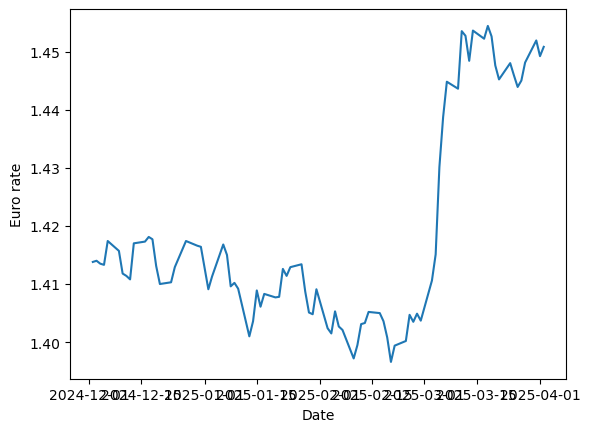

In [7]:
sns.lineplot(x='Date', y='Euro rate', data=usd)

<Axes: xlabel='Date', ylabel='Euro rate'>

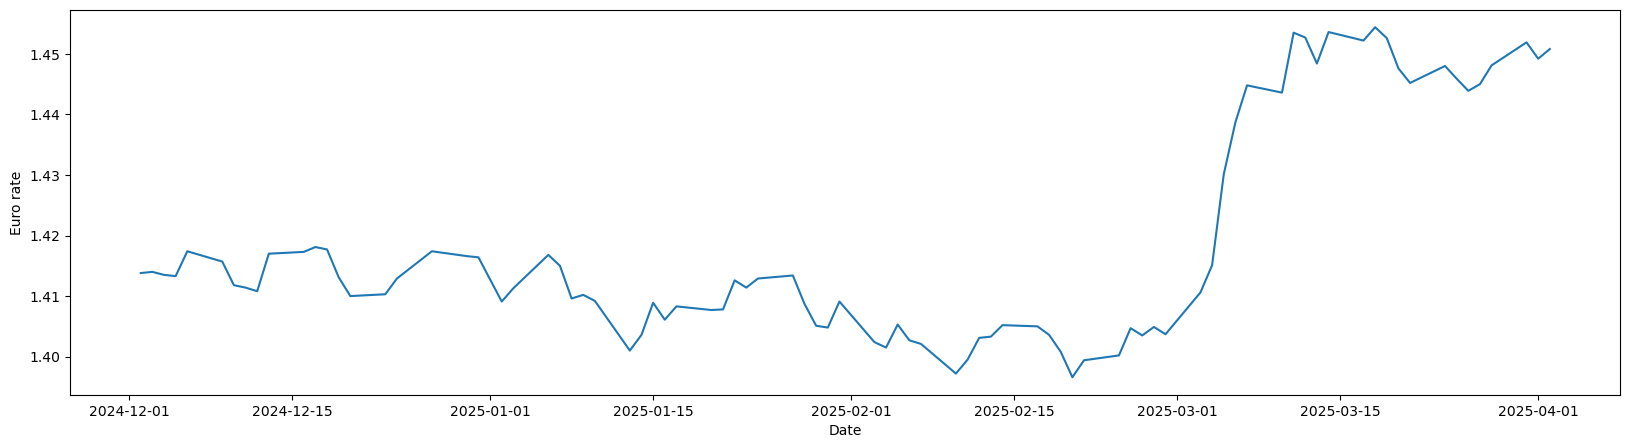

In [8]:
fig = plt.subplots(figsize=(20,5))
sns.lineplot(x='Date', y='Euro rate', data=usd)

[Text(0.5, 1.0, 'Euro per US_dollar rate'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Euro')]

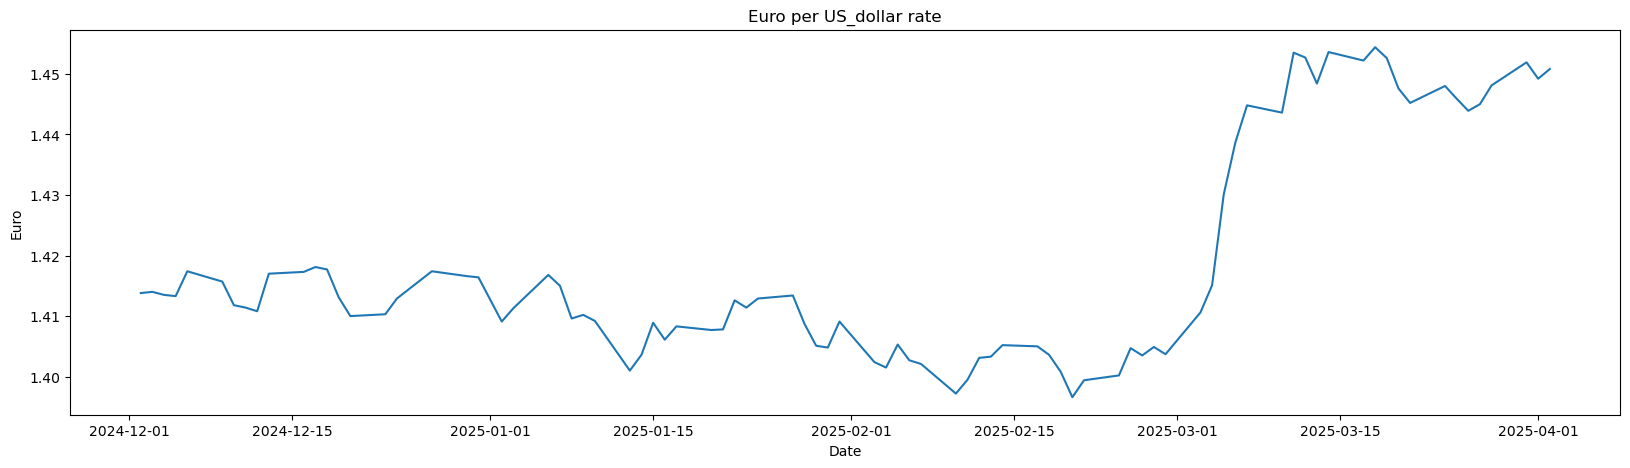

In [9]:
fig = plt.subplots(figsize=(20,5))
sns.lineplot(x='Date', y='Euro rate', data=usd).set(title='Euro per US_dollar rate', xlabel='Date', ylabel='Euro')

[Text(0.5, 1.0, 'Euro per US_dollar rate'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Euro')]

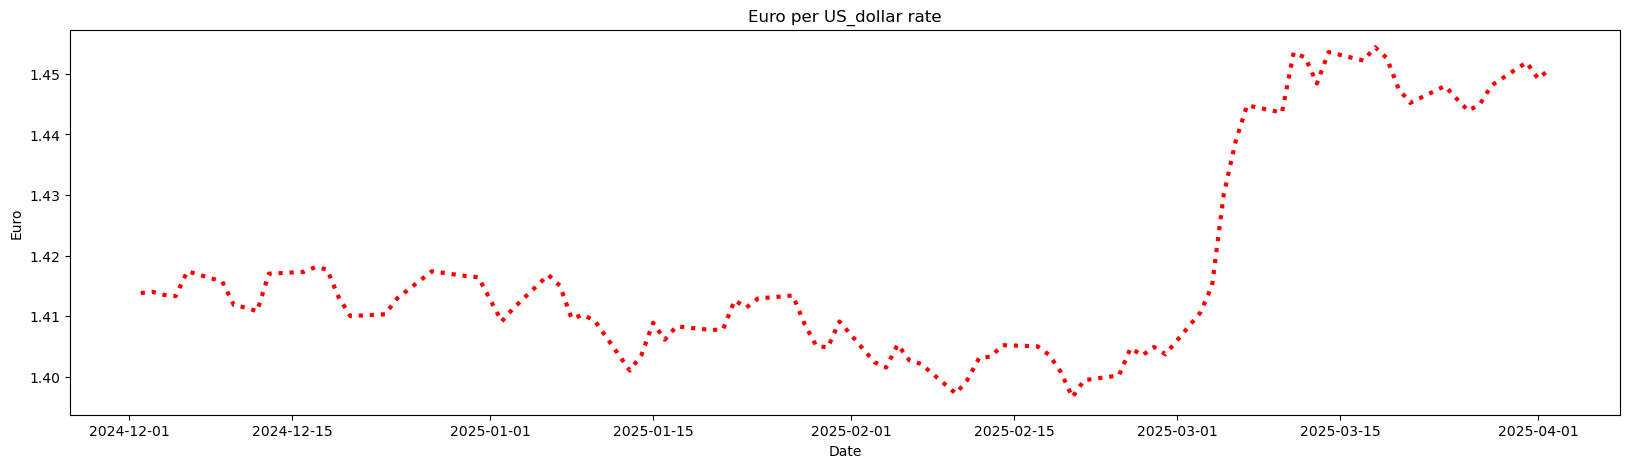

In [10]:
fig = plt.subplots(figsize=(20,5))
sns.lineplot(x='Date', y='Euro rate', data=usd, linestyle='dotted', color='red', linewidth= 3).set(title='Euro per US_dollar rate', xlabel='Date', ylabel='Euro')

[Text(0.5, 1.0, 'Euro per US_dollar rate'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Euro')]

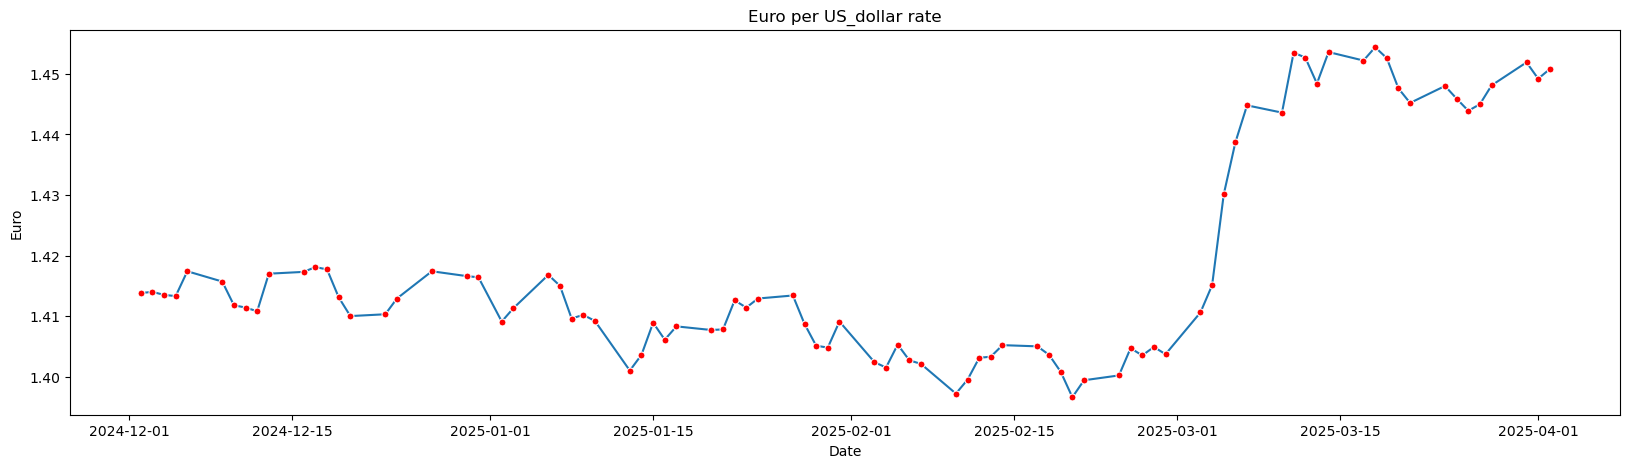

In [11]:
fig = plt.subplots(figsize=(20,5))
sns.lineplot(x='Date', y='Euro rate', data=usd, marker='o', markerfacecolor='red', markersize= 5).set(title='Euro per US_dollar rate', xlabel='Date', ylabel='Euro')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       340 non-null    datetime64[ns]
 1   Currency   340 non-null    object        
 2   Euro rate  340 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 8.1+ KB


<Axes: xlabel='Date', ylabel='Euro rate'>

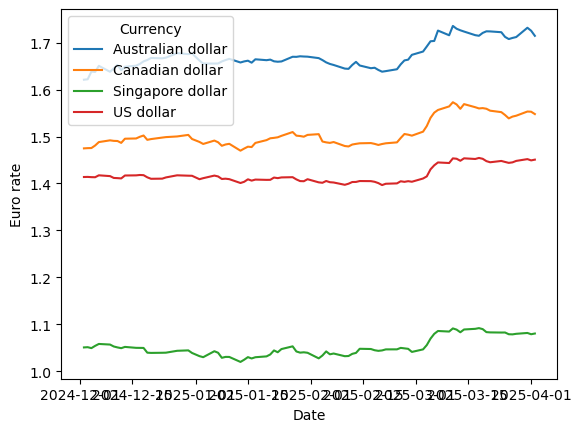

In [13]:
sns.lineplot(x='Date', y='Euro rate', hue='Currency', data= df)

<Axes: xlabel='Date', ylabel='Euro rate'>

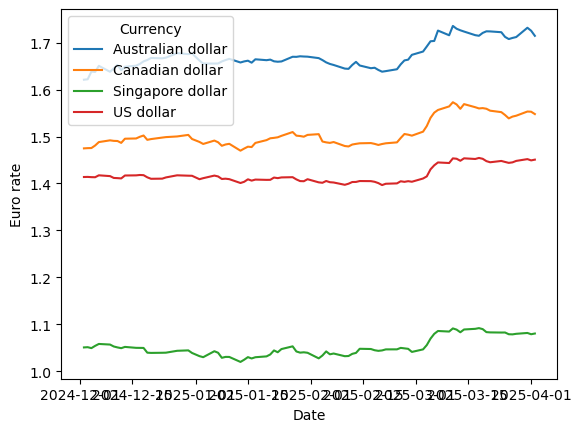

In [14]:
sns.lineplot(x='Date', y='Euro rate', hue='Currency', data= df)

<Axes: xlabel='Date', ylabel='Euro rate'>

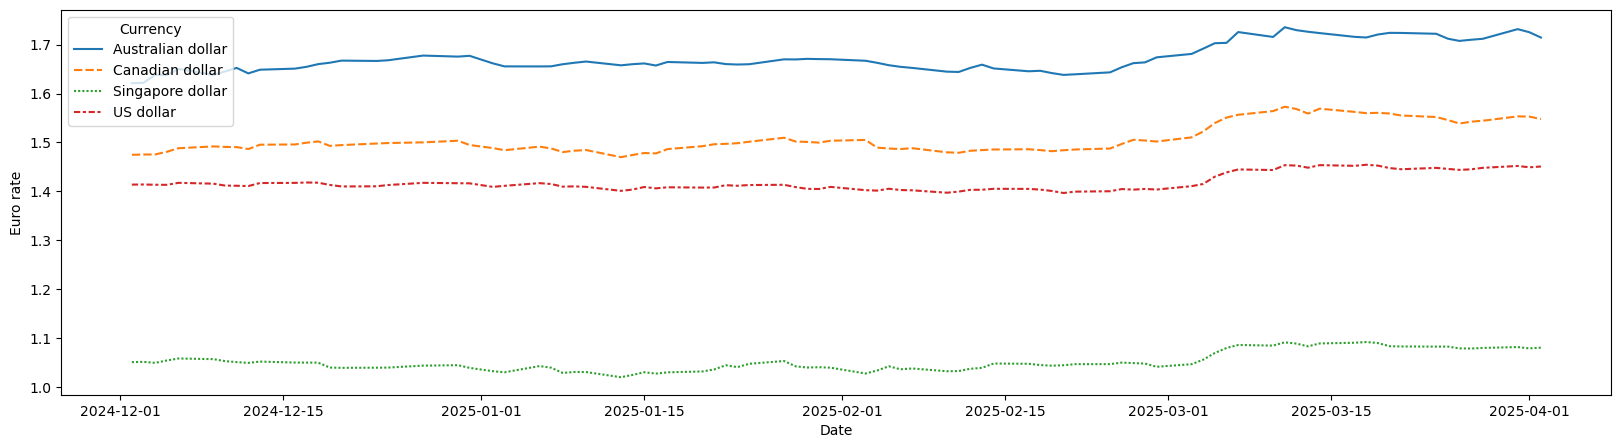

In [15]:
fig = plt.subplots(figsize=(20,5))
sns.lineplot(x='Date', y='Euro rate', hue='Currency', data= df, style='Currency')

<Axes: xlabel='Date', ylabel='Euro rate'>

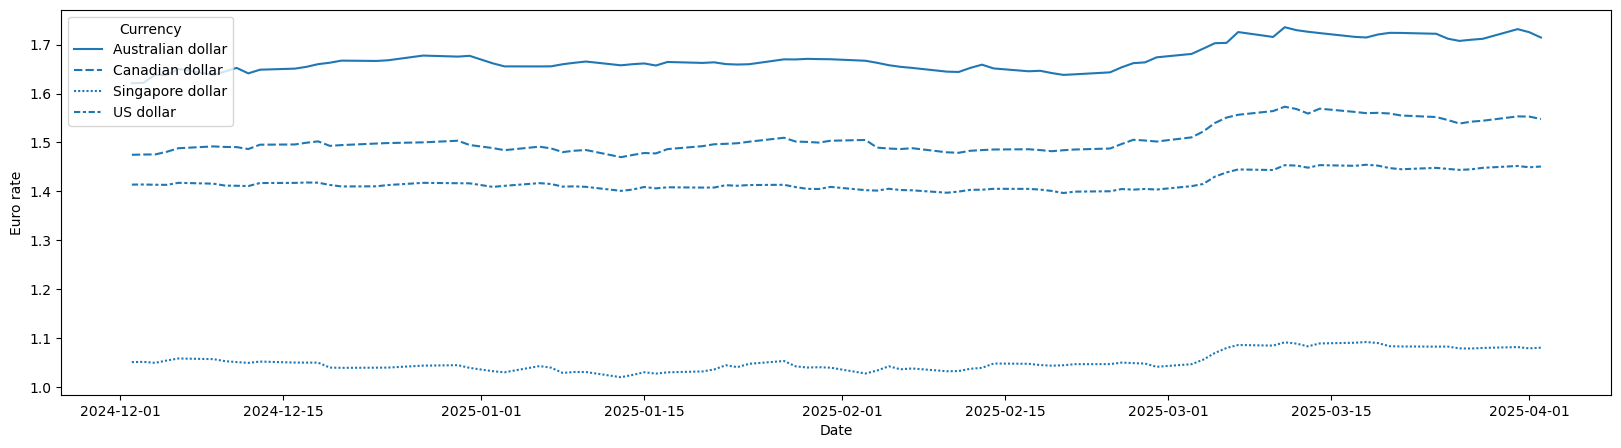

In [16]:
fig = plt.subplots(figsize=(20,5))
sns.lineplot(x='Date', y='Euro rate', data= df, style='Currency')

<Axes: xlabel='Date', ylabel='Euro rate'>

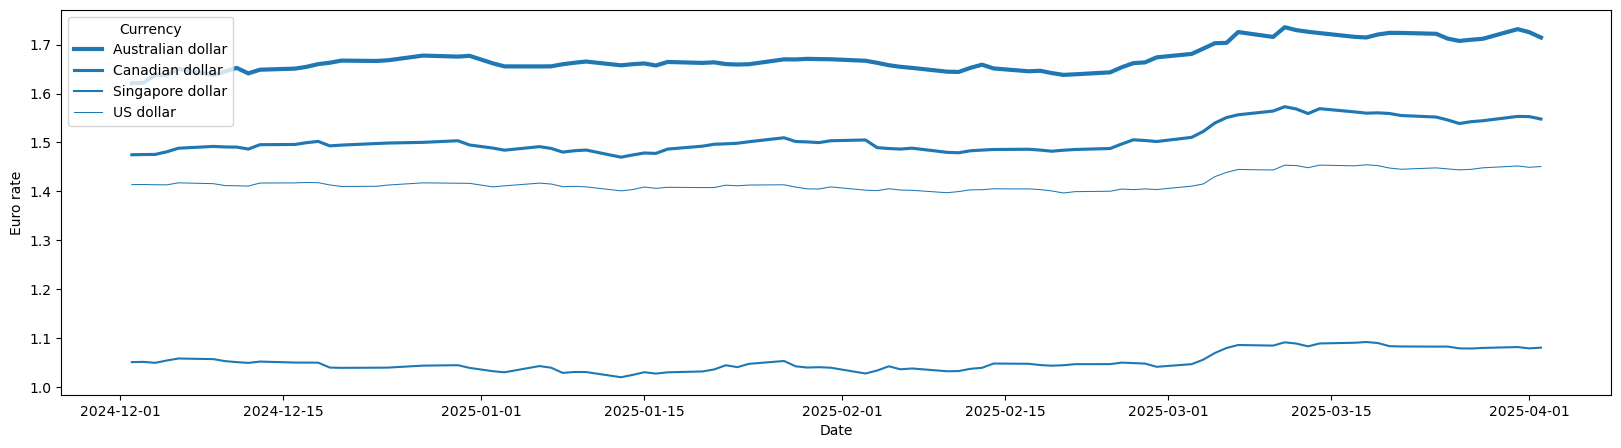

In [17]:
fig = plt.subplots(figsize=(20,5))
sns.lineplot(x='Date', y='Euro rate', data= df, size='Currency')

<Axes: xlabel='Date', ylabel='Euro rate'>

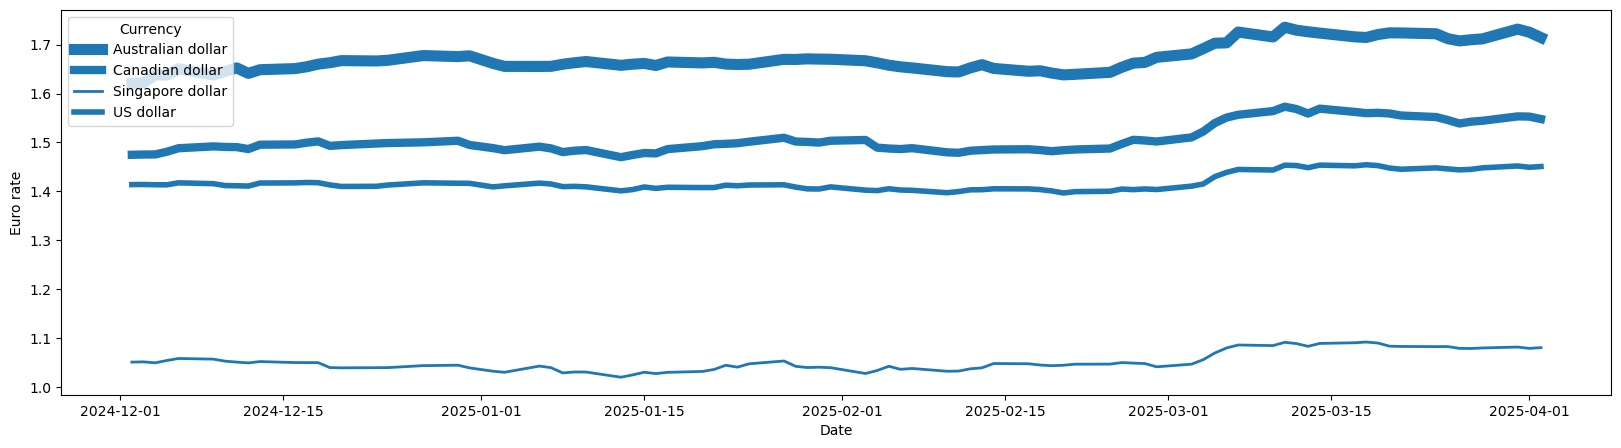

In [18]:
fig = plt.subplots(figsize=(20,5))
sns.lineplot(x='Date', y='Euro rate', data= df, size='Currency', sizes=[8,6,2,4])

<Axes: xlabel='Date', ylabel='Euro rate'>

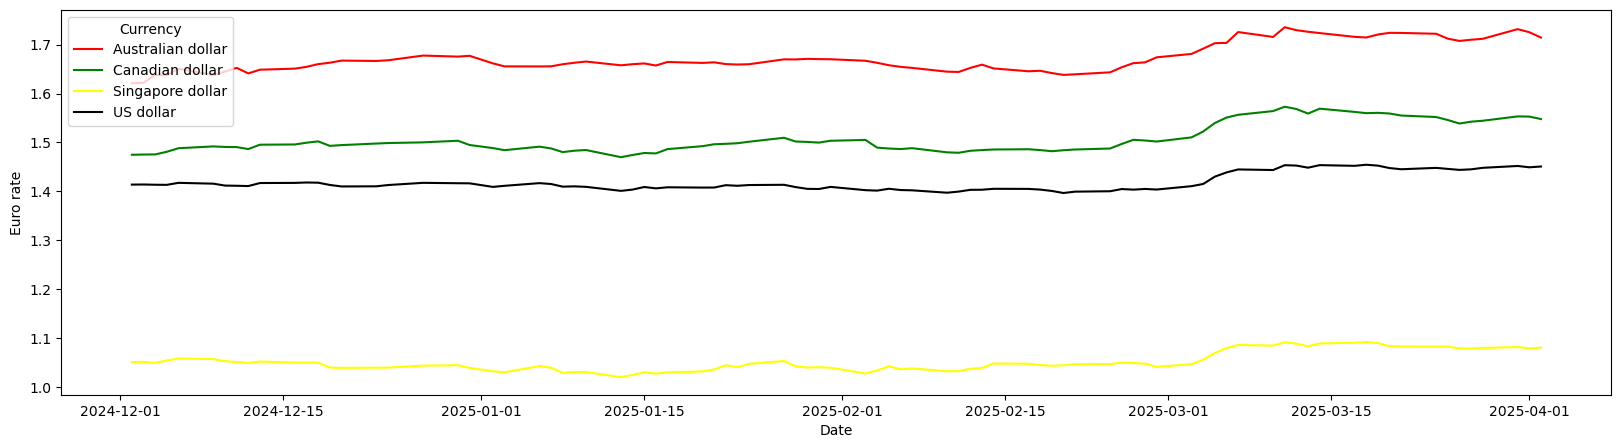

In [19]:
fig = plt.subplots(figsize=(20,5))
sns.lineplot(x='Date', y='Euro rate', data= df,hue='Currency', palette=['red','green','yellow','black'])

[Text(0.5, 1.0, 'Dollar Currencies per Euro'),
 Text(0.5, 0, 'Date Range'),
 Text(0, 0.5, 'Euro')]

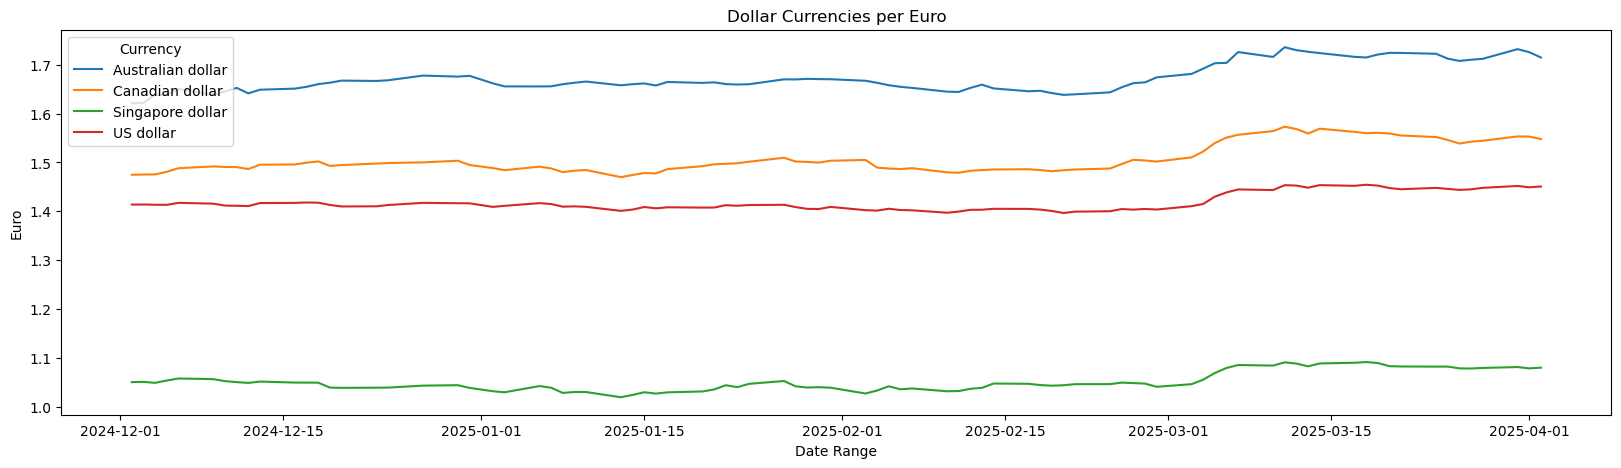

In [20]:
fig = plt.subplots(figsize=(20,5))
sns.lineplot(x='Date', y='Euro rate', data= df,hue='Currency').set(title='Dollar Currencies per Euro', xlabel='Date Range', ylabel='Euro')